In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# directories for the train and test sets
train_dir = "/content/drive/MyDrive/anyas-gojo-revival-space-shop/train.tsv"
test_dir = "/content/drive/MyDrive/anyas-gojo-revival-space-shop/test.tsv"


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import nltk
from gensim.models import Word2Vec


In [ ]:
df_train = pd.read_csv(train_dir, sep='\t')
df_test = pd.read_csv(test_dir, sep='\t')

In [ ]:
df_train.nunique()

date                  73
time                2484
id                  2520
reviewer name       2471
reviewer address    2520
contact number      2520
variation             16
verified_reviews    1966
sentiment              5
feedback               2
dtype: int64

In [ ]:
df_train.sample(5)

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback
577,25-Jul-18,01:15:26,3708746,Brittany Norman,Unit 9236 Box 3564\nDPO AE 18129,285-967-5918,Black Plus,This is a very useful device. I use it to tur...,5,1
616,30-Jul-18,06:06:59,3253521,Nicole Brown,USS Lopez\nFPO AP 45326,895-228-5334,Black Dot,Easy to set-up and to use.,5,1
1946,29-Jul-18,17:28:38,4960375,Haley Parker,"774 Robert Divide\nPatrickchester, LA 27869",201-699-2681,Charcoal Fabric,We enjoy it,5,1
2055,30-Jul-18,20:35:11,4536614,Michael Evans,"3220 Porter Canyon\nMeyerport, MH 03484",232-385-0286,Configuration: Fire TV Stick,Love it!,5,1
1375,31-Jul-18,22:10:39,6667675,Keith Gonzalez,"45061 John Courts Apt. 077\nLake Anita, NV 67199",6266616630,Walnut Finish,"Sometimes while playing a game, you can answer...",4,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2520 non-null   object
 1   time              2520 non-null   object
 2   id                2520 non-null   int64 
 3   reviewer name     2520 non-null   object
 4   reviewer address  2520 non-null   object
 5   contact number    2520 non-null   object
 6   variation         2520 non-null   object
 7   verified_reviews  2520 non-null   object
 8   sentiment         2520 non-null   int64 
 9   feedback          2520 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 197.0+ KB


<Axes: >

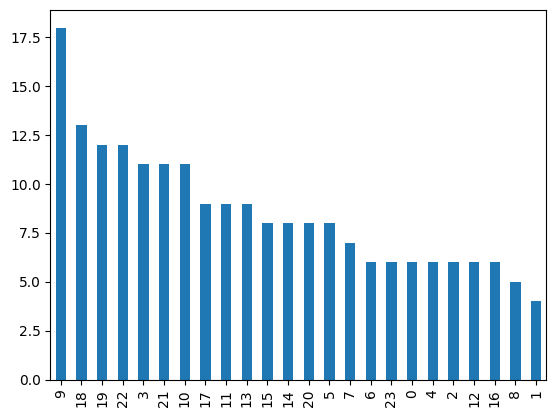

In [ ]:
# extracting time from time column

df_train['time'] = pd.to_datetime(df_train['time'], format='%H:%M:%S')
df_train.time.head(10)
df_train['new_time'] = df_train.time.dt.hour


df_test['time'] = pd.to_datetime(df_test['time'], format='%H:%M:%S')

df_test['new_time'] = df_test.time.dt.hour


df_train.new_time.head(10)
df_train[df_train['feedback'] == 0].new_time.value_counts().plot.bar()


In [ ]:
df_test.new_time.head()

0    16
1    17
2    16
3    19
4    16
Name: new_time, dtype: int64

In [ ]:
# checked for taking different parts of date, such as day and month, but no one provided any conclusive insight
df_train['date'] = pd.to_datetime(df_train['date'], format='%d-%b-%y')
df_test['date'] = pd.to_datetime(df_test['date'], format='%d-%b-%y')

df_train.head()

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback,new_time
0,2018-07-30,1900-01-01 02:16:00,5138527,Theresa Diaz,"2373 Long Mews\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,5,1,2
1,2018-07-30,1900-01-01 20:13:24,7881409,Michael Wagner,"34120 James Well Apt. 930\nSouth Kenneth, AK 5...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,5,1,20
2,2018-07-29,1900-01-01 03:20:48,5658396,Erin Rodriguez,"7996 Booth Mission\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,2,0,3
3,2018-07-30,1900-01-01 22:48:21,4317957,Christine Perez,USS Schaefer\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,5,1,22
4,2018-07-23,1900-01-01 12:36:42,7570569,Jamie Davila,"000 Kevin Cliffs Suite 674\nBrennanview, NM 77690",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,5,1,12


In [ ]:
# extracting STATE from reviewer address
lst = df_train['reviewer address']
final = []
for x in lst:
  lsts = x.split()
  final.append(lsts[-2])
df_train['state'] = final

lst = df_test['reviewer address']
final = []
for x in lst:
  lsts = x.split()
  final.append(lsts[-2])
df_test['state'] = final
df_train.state.value_counts()

AA    100
AE     87
AP     75
CO     53
NV     52
     ... 
LA     28
MD     27
VI     26
MO     26
WV     23
Name: state, Length: 62, dtype: int64

In [ ]:
df_train.sample(5)

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback,new_time,state
891,2018-05-17,1900-01-01 01:42:36,659971,Robert Moody,"5972 Martin Brooks Suite 855\nParkerchester, F...",727-469-8867,Black,Works great,5,1,1,FL
2070,2018-07-30,1900-01-01 09:58:53,847154,Matthew Austin,"8781 Anderson Point\nNew Timothy, MN 63354",(843)696-4539,Walnut Finish,A great investment. Alexa has helped me out an...,5,1,9,MN
2010,2018-07-30,1900-01-01 06:22:37,6609263,Victoria Parsons,"621 Jack Haven\nNew Martin, PA 45879",637-739-5135,Black Show,Good sound! The capacity of join different app...,5,1,6,PA
856,2018-07-31,1900-01-01 10:25:57,7315722,Janet Morgan,"29130 Dean Summit Apt. 002\nGarzaburgh, VA 99848",7746551857,Configuration: Fire TV Stick,It is much more difficult to use than the Chro...,2,0,10,VA
2271,2018-07-28,1900-01-01 04:19:33,4410516,Jon Lee,"235 Jesus Locks\nLake Austinchester, MT 62014",283-274-7508,White Show,Great sound and video!,5,1,4,MT


In [ ]:
# keeping id column safe for predictions
test_id = df_test['id']

columns_to_drop = ['date', 'time', 'reviewer name', 'id', 'reviewer address', 'contact number']

df_train.drop(columns=columns_to_drop, axis=1, inplace=True)

df_test.drop(columns=columns_to_drop, axis=1, inplace=True)

<Axes: xlabel='state', ylabel='count'>

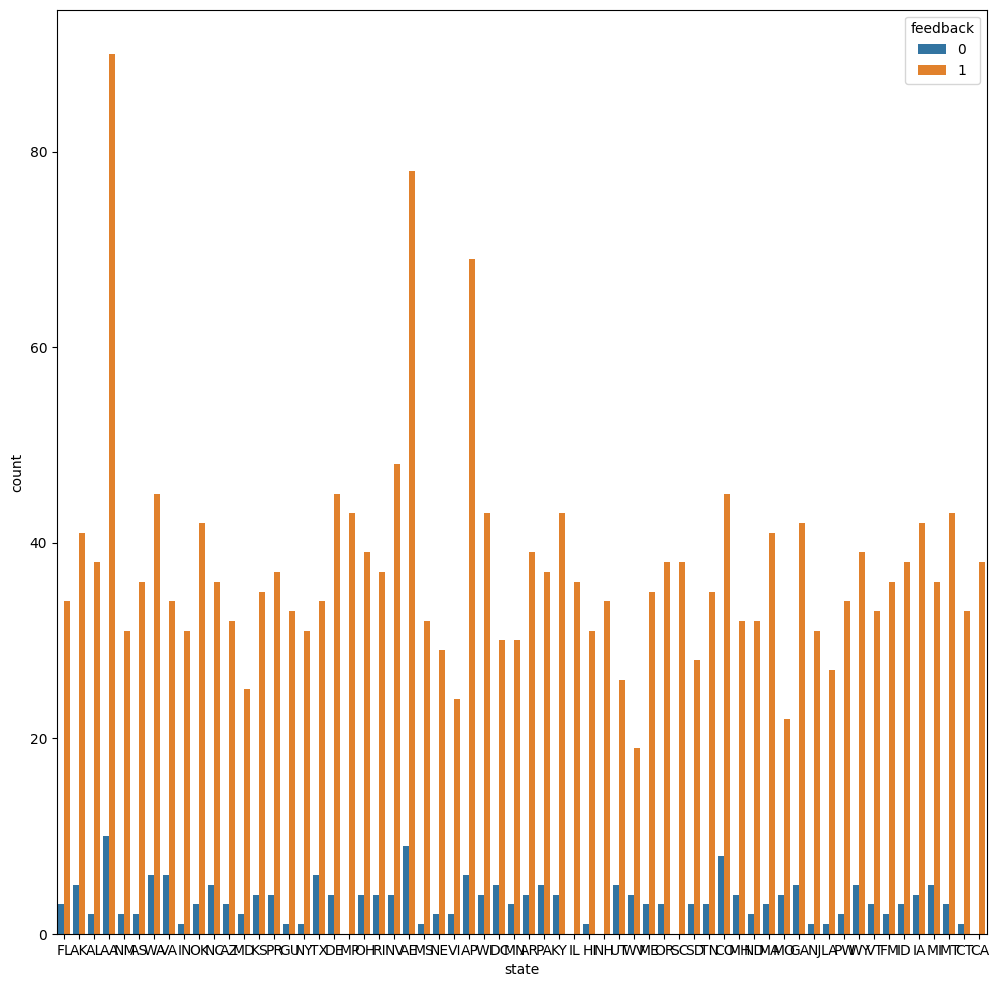

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x='state', hue='feedback', data=df_train)

In [ ]:
df_train[df_train.feedback == 0]['state'].value_counts()

AA    10
AE     9
CO     8
VA     6
TX     6
AP     6
WA     6
NC     5
MI     5
WY     5
GA     5
UT     5
AK     5
DC     5
PA     5
MO     4
KS     4
NV     4
MH     4
DE     4
PR     4
IA     4
OH     4
KY     4
WV     4
WI     4
RI     4
AR     4
FL     3
MA     3
ID     3
OR     3
OK     3
MN     3
TN     3
AZ     3
MT     3
ME     3
SD     3
VT     3
MD     2
AS     2
AL     2
ND     2
PW     2
NE     2
FM     2
VI     2
NM     2
LA     1
NJ     1
MS     1
GU     1
IN     1
CT     1
HI     1
NY     1
Name: state, dtype: int64

In [ ]:
df_train[df_train.feedback == 0 ][df_train['state'] == 'AA']
df_train[df_train.feedback == 0 ][df_train['state'] == 'AE']
df_train[df_train.feedback == 0 ][df_train['state'] == 'CO']

<ipython-input-15-00c79c9afe87>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train.feedback == 0 ][df_train['state'] == 'AA']
<ipython-input-15-00c79c9afe87>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train.feedback == 0 ][df_train['state'] == 'AE']
<ipython-input-15-00c79c9afe87>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train.feedback == 0 ][df_train['state'] == 'CO']


,variation,verified_reviews,sentiment,feedback,new_time,state
76,Black Spot,Bought the spot and loved it. Within months it...,1,0,12,CO
264,Black Dot,Sound is terrible. Cannot pair with echo to pl...,2,0,6,CO
888,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,2,0,21,CO
1237,Black,Stopped working after 7 months. The warranty w...,1,0,9,CO
1855,Configuration: Fire TV Stick,It still doesn’t work. I bet if I call and le...,1,0,5,CO
1976,Black Spot,I would love this but there is no way to stop ...,1,0,22,CO
2383,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",2,0,20,CO
2507,White Show,The tech isn’t there. It doesn’t understand mo...,1,0,17,CO


# inference, mostly negative feedbacks (0) have 1,2 sentiments

In [ ]:
df_train.sample(5)

,variation,verified_reviews,sentiment,feedback,new_time,state
391,Black Show,It’s fun,5,1,12,DC
665,Configuration: Fire TV Stick,Love this!,5,1,16,NV
2105,Black Dot,I am really enjoying the many different featur...,5,1,21,CT
610,White Show,Love it,5,1,2,CO
2083,Black Show,I loved everything about this item. Quick resp...,5,1,10,AA


In [ ]:
print(df_train.verified_reviews[10])
df_test.verified_reviews[100]


Totally enjoy our new Echo Plus.  Great for fast facts and listening to Beautiful Music.  We are just getting started with all the benefits.


"We love Alexa! We use her to play music, play radio through iTunes, play podcasts through Anypod, and set reminders. We listen to our flash briefing of news and weather every morning. We rely on our custom lists. We like being able to voice control the volume. We're sure we'll continue to find new uses.Sometimes it's a bit frustrating when Alexa doesn't understand what we're saying."

In [ ]:

def preprocess_and_word2vec(column_name, df_train, df_test, vector_size=100, window=5, min_count=1, workers=4, epochs=10):

    # Combining train and test data for consistent processing
    combined_data = pd.concat([df_train[column_name], df_test[column_name]], axis=0)

    # Function to perform preprocessing on a single text
    def preprocess_text(text):
        # making tokens
        tokens = word_tokenize(text)

        # Removing stop words, non-alphabetic characters, and performing lemmatization (chose lemmatization over stemming to keep meaningful words for word2vec)
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if (word.isalpha() and word.lower() not in stop_words)]

        return tokens

    # Applying preprocessing to each document in the combined data
    combined_data_preprocessed = combined_data.apply(preprocess_text)

    # Train Word2Vec model
    model = Word2Vec(sentences=combined_data_preprocessed, vector_size=vector_size, window=window,
                     min_count=min_count, workers=workers, epochs=epochs)

    # Function to get the vector representation of a document
    def get_vector(text):
        tokens = preprocess_text(text)
        vector = sum([model.wv[word] for word in tokens if word in model.wv])
        return vector / len(tokens) if len(tokens) > 0 else [0] * vector_size

    # Applying Word2Vec to each document in train and test
    df_train_processed = df_train[column_name].apply(get_vector).apply(pd.Series)
    df_test_processed = df_test[column_name].apply(get_vector).apply(pd.Series)

    # Renaming columns to avoid collisions
    df_train_processed.columns = [f'{column_name}_w2v_{i}' for i in df_train_processed.columns]
    df_test_processed.columns = [f'{column_name}_w2v_{i}' for i in df_test_processed.columns]

    return model, df_train_processed, df_test_processed


# now applying some basic preprocessing and TF-IDF

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_and_tfidf(column_name, df_train, df_test):

    # Combining train and test data for consistent processing
    combined_data = pd.concat([df_train[column_name], df_test[column_name]], axis=0)

    # Function to perform preprocessing on a single text
    def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(text)

        # Remove stop words, non-alphabetic characters, and perform lemmatization
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if (word.isalpha() and word.lower() not in stop_words)]

        # Rejoin the tokens into a single string
        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

    # Apply preprocessing to each document in the combined data
    combined_data_preprocessed = combined_data.apply(preprocess_text)

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data_preprocessed)

    # Separate the processed data back into train and test
    df_train_processed = pd.DataFrame(tfidf_matrix[:len(df_train)].toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    df_test_processed = pd.DataFrame(tfidf_matrix[len(df_train):].toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Rename columns to avoid collisions
    df_train_processed.columns = [f'{column_name}_{col}' for col in df_train_processed.columns]
    df_test_processed.columns = [f'{column_name}_{col}' for col in df_test_processed.columns]

    return df_train_processed, df_test_processed

# applying tf-idf to state
column_name_to_process = 'state'
df_train_processed, df_test_processed = preprocess_and_tfidf(column_name_to_process, df_train, df_test)
df_train = pd.concat([df_train, df_train_processed], axis=1)
df_test = pd.concat([df_test, df_test_processed], axis=1)

# applying tf-idf to verified_reviews
# column_name_to_process = 'verified_reviews'
# df_train_processed, df_test_processed = preprocess_and_tfidf(column_name_to_process, df_train, df_test)
# df_train = pd.concat([df_train, df_train_processed], axis=1)
# df_test = pd.concat([df_test, df_test_processed], axis=1)

# applying word2vec to verified_reviews
column_name_to_process = 'verified_reviews'
word2vec_model, df_train_processed, df_test_processed = preprocess_and_word2vec(column_name_to_process, df_train, df_test)
df_train = pd.concat([df_train, df_train_processed], axis=1)
df_test = pd.concat([df_test, df_test_processed], axis=1)
print(len(df_train.columns))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


161


In [ ]:
# applying tf-idf to variation as well
column_name_to_process = 'variation'
df_train_processed, df_test_processed = preprocess_and_tfidf(column_name_to_process, df_train, df_test)
df_train = pd.concat([df_train, df_train_processed], axis=1)
df_test = pd.concat([df_test, df_test_processed], axis=1)

In [ ]:
# # applying tf-idf to state as well
# column_name_to_process = 'variation'
# df_train_processed, df_test_processed = preprocess_and_tfidf(column_name_to_process, df_train, df_test)
# df_train = pd.concat([df_train, df_train_processed], axis=1)
# df_test = pd.concat([df_test, df_test_processed], axis=1)

In [ ]:
df_train.variation.head()

0                     Black  Plus
1    Configuration: Fire TV Stick
2                     Black  Show
3            Heather Gray Fabric 
4                     Black  Plus
Name: variation, dtype: object

In [ ]:
# df_train.sentiment.head()
drops = ['verified_reviews','variation']
df_train = df_train.drop(drops, axis = 1)
df_test = df_test.drop(drops, axis = 1)
df_test.head()

,feedback,new_time,state,state_aa,state_ae,state_ak,state_al,state_ap,state_ar,state_az,...,variation_heather,variation_oak,variation_plus,variation_sandstone,variation_show,variation_spot,variation_stick,variation_tv,variation_walnut,variation_white
0,1,16,MH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.645028,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,17,SD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.882352,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,16,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.5,0.5,0.0,0.0
3,1,19,WI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.882352,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,16,NJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.882003,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Identify the 'state' columns with string data
string_state_columns = df_train.select_dtypes(include='object').columns

# Drop the 'state' columns with string data
df_train = df_train.drop(string_state_columns, axis=1)

string_state_columns = df_test.select_dtypes(include='object').columns
df_test = df_test.drop(string_state_columns, axis=1)


In [ ]:

common_columns = set(df_train.columns) & set(df_test.columns)

# Keep only the common columns, including 'sentiment' in df_train
df_train = df_train[['sentiment'] + list(common_columns)]
df_test = df_test[list(common_columns)]

# Display the first few rows of the updated DataFrames
print("Updated df_train:")
print(df_train.head())

print("\nUpdated df_test:")
print(df_test.head())


Updated df_train:
   sentiment  verified_reviews_w2v_63  verified_reviews_w2v_4  \
0          5                -0.086563                0.320103   
1          5                -0.079034                0.318530   
2          2                -0.056819                0.221889   
3          5                -0.046663                0.241674   
4          5                -0.048374                0.295794   

   verified_reviews_w2v_38  state_ct  state_wa  state_mo  \
0                -0.367694       0.0       0.0       0.0   
1                -0.426238       0.0       0.0       0.0   
2                -0.269575       0.0       0.0       0.0   
3                -0.328085       0.0       0.0       0.0   
4                -0.361815       0.0       0.0       0.0   

   verified_reviews_w2v_49  verified_reviews_w2v_32  verified_reviews_w2v_87  \
0                 0.287014                 0.266837                 0.721871   
1                 0.219521                 0.265669                 0.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC

# 1. Prepare the Target Variable
y = df_train['sentiment']

# 2. Train-Validation Split (90-10 split)
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('sentiment', axis=1), y, test_size=0.1, random_state=42)

# Define a dictionary of models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Loop through each model
for model_name, model in models.items():
    # Train and Evaluate each model
    # train_evaluate_model(model, X_train, y_train, X_val, y_val)
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on Validation Set
    y_val_pred = model.predict(X_val)

    # Evaluate Metrics on Validation Set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    f1_macro_val = f1_score(y_val, y_val_pred, average='macro')
    classification_report_val = classification_report(y_val, y_val_pred)

    # Display Metrics on Validation Set
    print(f'Model: {type(model).__name__}')
    print(f'Validation Accuracy: {accuracy_val}')
    print(f'Macro F1 Score: {f1_macro_val}')
    print(f'Classification Report (Validation):\n{classification_report_val}')
    print('\n')

    # 5. Predictions on Test Set
    X_test = df_test  # Assuming df_test_combined is already processed
    y_test_pred = model.predict(X_test)

    # 6. Create a DataFrame for the final predictions
    df_predictions = pd.DataFrame({'id': test_id, 'sentiment': y_test_pred})

    # Save the predictions to a CSV file with the model name as the filename
    df_predictions.to_csv(f"{model_name}_predictions.csv", index=False)

    # Display the first few rows of the predictions DataFrame
    print(df_predictions.sentiment.value_counts())


Model: RandomForestClassifier
Validation Accuracy: 0.8134920634920635
Macro F1 Score: 0.5914848151710869
Classification Report (Validation):
              precision    recall  f1-score   support

           1       0.75      0.83      0.79        18
           2       0.80      0.40      0.53        10
           3       1.00      0.11      0.20        18
           4       0.93      0.38      0.54        34
           5       0.81      0.99      0.89       172

    accuracy                           0.81       252
   macro avg       0.86      0.54      0.59       252
weighted avg       0.84      0.81      0.77       252



5    536
4     37
1     33
2     12
3     12
Name: sentiment, dtype: int64
